In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to aggregate SHAP values for each segment
def aggregate_shap_for_segments(shap_values, num_segments_vertical=5, num_segments_horizontal=4):
    segment_height = shap_values.shape[0] // num_segments_vertical
    segment_width = shap_values.shape[1] // num_segments_horizontal
    aggregated_shap = np.zeros((num_segments_vertical, num_segments_horizontal))

    for i in range(num_segments_vertical):
        for j in range(num_segments_horizontal):
            y_start = i * segment_height
            y_end = (i + 1) * segment_height if (i < num_segments_vertical - 1) else shap_values.shape[0]
            x_start = j * segment_width
            x_end = (j + 1) * segment_width if (j < num_segments_horizontal - 1) else shap_values.shape[1]
            aggregated_shap[i, j] = shap_values[y_start:y_end, x_start:x_end].mean()

    return aggregated_shap

# Function to get sorted file paths from a directory
def get_sorted_file_paths(directory):
    file_paths = [os.path.join(directory, file_name) for file_name in sorted(os.listdir(directory))]
    return file_paths

# Initialize an array to hold the mean SHAP values for each feature across all images
global_shap_importance = np.zeros((5, 4))

# Paths to the directories containing MRI images and SHAP values
mri_images_directory = '/content/drive/My Drive/20_MRI'
shap_values_directory = '/content/drive/My Drive/SHAPvalues'

# Get sorted lists of file paths for MRI images and SHAP values
mri_images = get_sorted_file_paths(mri_images_directory)
shap_values_files = get_sorted_file_paths(shap_values_directory)

# Ensure we have the same number of MRI images and SHAP value files
assert len(mri_images) == len(shap_values_files), "The number of MRI images and SHAP value files must be the same."

for mri_image_path, shap_values_path in zip(mri_images, shap_values_files):
    mri_scan = imread(mri_image_path)
    shap_values = np.load(shap_values_path)

    # Process SHAP values if needed (e.g., remove batch dimension, sum over channels)
    shap_values_processed = shap_values[0].sum(axis=-1)

    # Check dimensions match
    assert mri_scan.shape[:2] == shap_values_processed.shape, "Dimensions of MRI scan and SHAP values do not match."

    # Aggregate SHAP values for segments
    aggregated_shap = aggregate_shap_for_segments(shap_values_processed)

    # Add the aggregated values to the global importance matrix
    global_shap_importance += aggregated_shap

# Calculate the mean importance across all images
global_shap_importance_mean = global_shap_importance / len(mri_images)

print("Global SHAP Importance Matrix (Mean):")
print(global_shap_importance_mean)


Global SHAP Importance Matrix (Mean):
[[-2.45714021e-07 -3.60150868e-05 -4.98148794e-06 -5.40538435e-07]
 [ 1.06918557e-05  3.42093975e-05 -1.75470979e-05 -7.96982700e-06]
 [ 1.23474043e-05  1.58079650e-05  2.77226814e-06  1.52644524e-05]
 [-1.21392654e-05  1.46266229e-05  1.94013443e-05 -5.21597253e-07]
 [ 1.01700653e-06 -1.23364323e-05  6.85114590e-06  3.94311143e-06]]


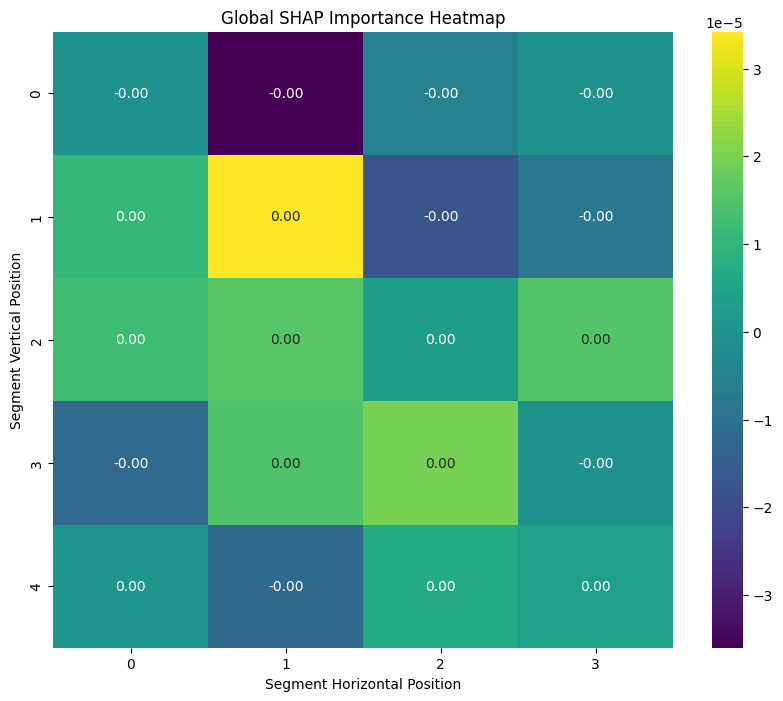

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean importance across all images
global_shap_importance_mean = global_shap_importance / len(mri_images)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(global_shap_importance_mean, annot=True, fmt='.2f', cmap='viridis')
plt.title('Global SHAP Importance Heatmap')
plt.xlabel('Segment Horizontal Position')
plt.ylabel('Segment Vertical Position')
plt.show()


Global SHAP Importance Matrix (Mean):
[[4.83707773e-06 1.97612689e-04 2.27736241e-04 3.51935455e-06]
 [1.33123060e-04 5.33045907e-04 4.42412909e-04 1.43108443e-04]
 [2.28109583e-04 5.00284850e-04 8.08553720e-04 2.04753464e-04]
 [2.06597935e-04 6.21001076e-04 7.59581055e-04 9.96289973e-05]
 [2.64289578e-05 2.91642630e-04 2.61716437e-04 1.58854337e-05]]


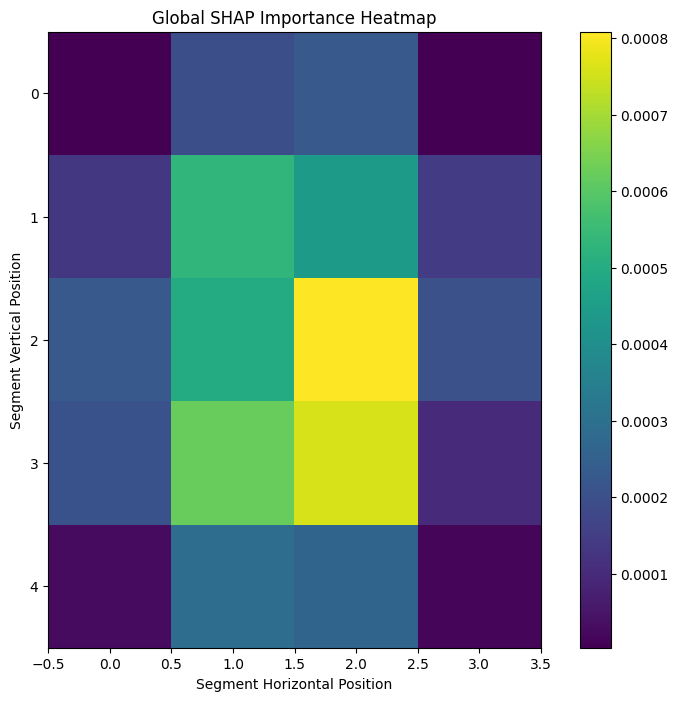

In [ ]:
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to aggregate SHAP values for each segment, taking the absolute value
def aggregate_shap_for_segments(shap_values, num_segments_vertical=5, num_segments_horizontal=4):
    segment_height = shap_values.shape[0] // num_segments_vertical
    segment_width = shap_values.shape[1] // num_segments_horizontal
    aggregated_shap = np.zeros((num_segments_vertical, num_segments_horizontal))

    for i in range(num_segments_vertical):
        for j in range(num_segments_horizontal):
            y_start = i * segment_height
            y_end = (i + 1) * segment_height if (i < num_segments_vertical - 1) else shap_values.shape[0]
            x_start = j * segment_width
            x_end = (j + 1) * segment_width if (j < num_segments_horizontal - 1) else shap_values.shape[1]
            # Sum the absolute SHAP values within each segment to capture the overall impact
            aggregated_shap[i, j] = np.abs(shap_values[y_start:y_end, x_start:x_end]).mean()

    return aggregated_shap

# Function to get sorted file paths from a directory
def get_sorted_file_paths(directory):
    file_paths = [os.path.join(directory, file_name) for file_name in sorted(os.listdir(directory))]
    return file_paths

# Initialize an array to hold the mean SHAP values for each feature across all images
global_shap_importance = np.zeros((5, 4))

# Paths to the directories containing MRI images and SHAP values
mri_images_directory = '/content/drive/My Drive/20_MRI'
shap_values_directory = '/content/drive/My Drive/SHAPvalues'

# Get sorted lists of file paths for MRI images and SHAP values
mri_images = get_sorted_file_paths(mri_images_directory)
shap_values_files = get_sorted_file_paths(shap_values_directory)

# Ensure we have the same number of MRI images and SHAP value files
assert len(mri_images) == len(shap_values_files), "The number of MRI images and SHAP value files must be the same."

for mri_image_path, shap_values_path in zip(mri_images, shap_values_files):
    mri_scan = imread(mri_image_path)
    shap_values = np.load(shap_values_path)

    # Process SHAP values if needed (e.g., remove batch dimension, sum over channels)
    shap_values_processed = shap_values[0].sum(axis=-1)

    # Check dimensions match
    assert mri_scan.shape[:2] == shap_values_processed.shape, "Dimensions of MRI scan and SHAP values do not match."

    # Aggregate SHAP values for segments
    aggregated_shap = aggregate_shap_for_segments(shap_values_processed)

    # Add the aggregated values to the global importance matrix
    global_shap_importance += aggregated_shap

# Calculate the mean importance across all images
global_shap_importance_mean = global_shap_importance / len(mri_images)

print("Global SHAP Importance Matrix (Mean):")
print(global_shap_importance_mean)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(global_shap_importance_mean, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Global SHAP Importance Heatmap')
plt.xlabel('Segment Horizontal Position')
plt.ylabel('Segment Vertical Position')
plt.show()


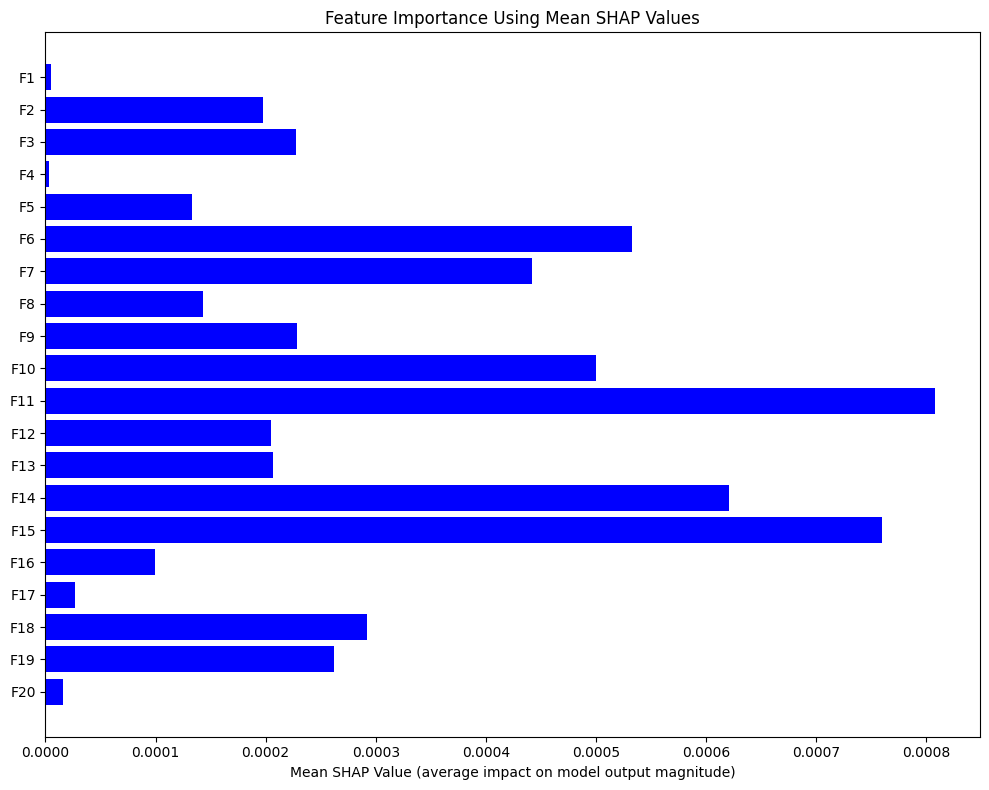

In [ ]:
# Flatten the global_shap_importance_mean to get a 1D array of mean SHAP values for each feature
flattened_mean_shap_values = global_shap_importance_mean.flatten()

# Create a list of feature names for the horizontal bar chart
feature_names = [f'F{i+1}' for i in range(len(flattened_mean_shap_values))]

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_names, flattened_mean_shap_values, color='blue')
plt.xlabel('Mean SHAP Value (average impact on model output magnitude)')
plt.title('Feature Importance Using Mean SHAP Values')
plt.gca().invert_yaxis()  # Invert y-axis to have the feature with the highest SHAP value at the top
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


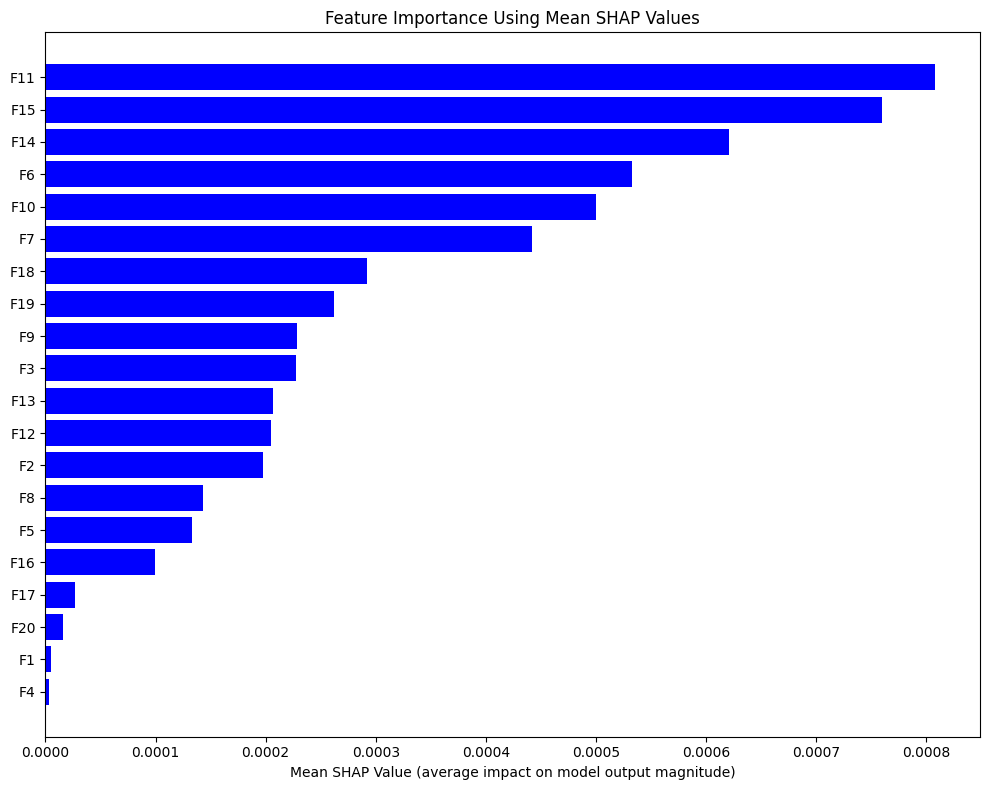

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the global_shap_importance_mean to get a 1D array of mean SHAP values for each feature
flattened_mean_shap_values = global_shap_importance_mean.flatten()

# Generate feature names
feature_names = [f'F{i+1}' for i in range(len(flattened_mean_shap_values))]

# Sort the features by their mean SHAP value in descending order
sorted_indices = np.argsort(flattened_mean_shap_values)[::-1]
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_shap_values = flattened_mean_shap_values[sorted_indices]

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_shap_values, color='blue')
plt.xlabel('Mean SHAP Value (average impact on model output magnitude)')
plt.title('Feature Importance Using Mean SHAP Values')
plt.gca().invert_yaxis()  # Invert y-axis to have the feature with the highest SHAP value at the top
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import Normalize

# Load the MRI scan
mri_scan = imread('/content/drive/My Drive/10_Samples_MRI/Mild/Copy of mild_688.jpg')

# Assume global_shap_importance_mean has been computed as before

# Normalize the SHAP values for color mapping
norm = Normalize(vmin=-np.abs(global_shap_importance_mean).max(), vmax=np.abs(global_shap_importance_mean).max())

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Show the grayscale MRI scan
ax.imshow(mri_scan, cmap='gray')

# Overlay the segments with colors corresponding to the SHAP values
for i in range(num_segments_vertical):
    for j in range(num_segments_horizontal):
        # Define the segment boundaries
        y_start = i * segment_height
        y_end = (i + 1) * segment_height if (i < num_segments_vertical - 1) else mri_scan.shape[0]
        x_start = j * segment_width
        x_end = (j + 1) * segment_width if (j < num_segments_horizontal - 1) else mri_scan.shape[1]

        # Get the SHAP value for the segment
        shap_value = global_shap_importance_mean[i, j]

        # Get the color for the SHAP value using a colormap
        segment_color = plt.cm.seismic(norm(shap_value))

        # Create a rectangle patch with the color of the SHAP value
        rect = patches.Rectangle((x_start, y_start), segment_width, segment_height,
                                 linewidth=1, edgecolor='black', facecolor=segment_color, fill=True)
        ax.add_patch(rect)

# Create a colorbar with the seismic colormap
sm = plt.cm.ScalarMappable(cmap=plt.cm.seismic, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('SHAP value (feature importance)')

# Turn off axes
ax.axis('off')
plt.tight_layout()
plt.show()


FileNotFoundError: No such file: '/content/drive/My Drive/10_Samples_MRI/Mild/Copy of mild_688.jpg'